In this example, we train an auto-encoder to handle anomalous data. When one has a lot of "good" examples and a few "fraudulent" ones, it's often better to attempt to predict how the "good" examples look like (e.g. by means of an auto-encoder that will reproduce it) which then can be used to identify "outliers".

Note that in this example we don't know much about the input features Vx (see below) because these have been obtained through [Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis).


More information available at 

https://www.kaggle.com/mlg-ulb/creditcardfraud/data

We start by importing the dataset.

In [1]:
import pandas as pd

df = pd.read_csv("https://potamianos.eu/files/creditcard.csv.zip")

In [2]:
df.head()


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [3]:
pd.value_counts(df['Class'], sort = True)

/var/folders/s1/jwbs3ft90338zd1zy7hq220r0000gn/T/ipykernel_31638/155976697.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['Class'], sort = True)


Class
0    284315
1       492
Name: count, dtype: int64

/var/folders/s1/jwbs3ft90338zd1zy7hq220r0000gn/T/ipykernel_31638/3284307420.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort = True)


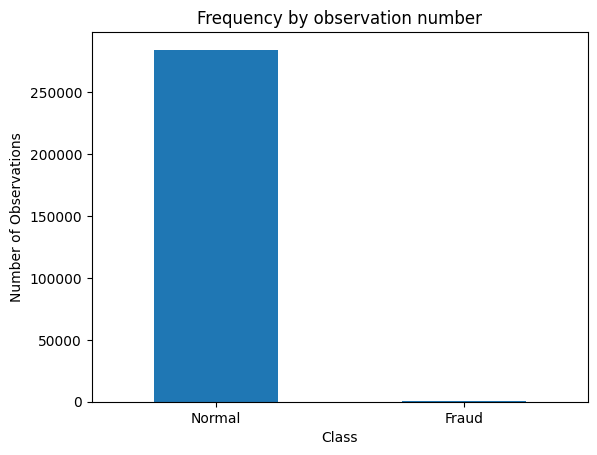

In [4]:
import matplotlib.pyplot as plt
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), ["Normal", "Fraud"])
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

In [5]:
# Split fraudulent and non-fraudulent dataframes

normal_df = df[df.Class == 0]
fraud_df = df[df.Class == 1]

In [6]:
normal_df.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [7]:
fraud_df.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

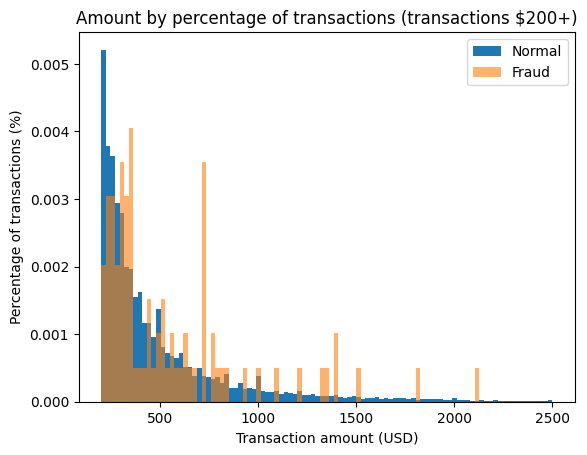

In [8]:
import numpy as np

bins = np.linspace(200, 2500, 100)
plt.hist(normal_df.Amount, bins, alpha=1, density=True, label='Normal')
plt.hist(fraud_df.Amount, bins, alpha=0.6, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200+)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)");
plt.show()

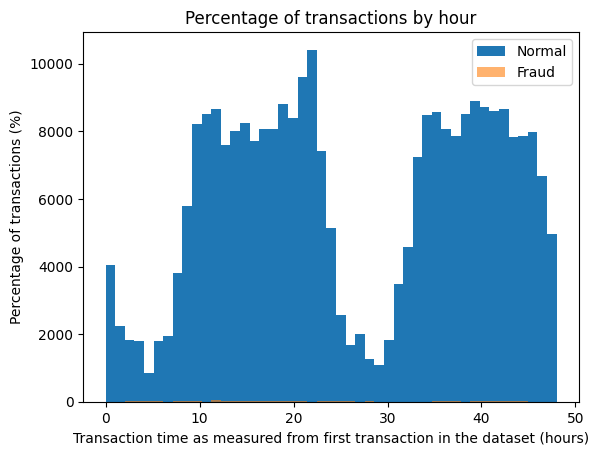

In [9]:
bins = np.linspace(0, 48, 48) #48 hours
plt.hist((normal_df.Time/(60*60)), bins, alpha=1, label='Normal')
plt.hist((fraud_df.Time/(60*60)), bins, alpha=0.6, label='Fraud')
plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time as measured from first transaction in the dataset (hours)")
plt.ylabel("Percentage of transactions (%)");
#plt.hist((df.Time/(60*60)),bins)
plt.show()


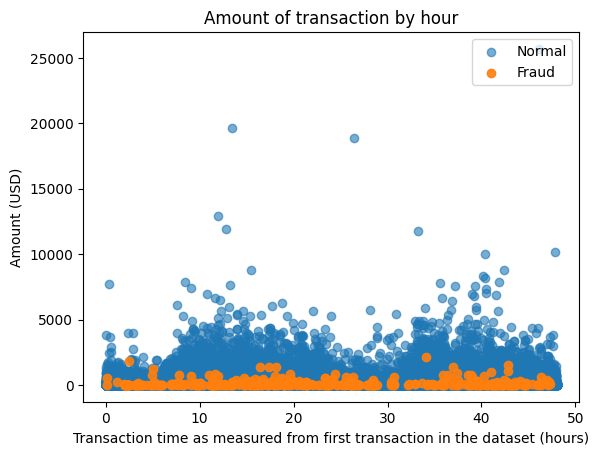

In [10]:
plt.scatter((normal_df.Time/(60*60)), normal_df.Amount, alpha=0.6, label='Normal')
plt.scatter((fraud_df.Time/(60*60)), fraud_df.Amount, alpha=0.9, label='Fraud')
plt.title("Amount of transaction by hour")
plt.xlabel("Transaction time as measured from first transaction in the dataset (hours)")
plt.ylabel('Amount (USD)')
plt.legend(loc='upper right')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
df_norm = df
df_norm['Time'] = StandardScaler().fit_transform(df_norm['Time'].values.reshape(-1, 1))
df_norm['Amount'] = StandardScaler().fit_transform(df_norm['Amount'].values.reshape(-1, 1))

In [12]:
from sklearn.model_selection import train_test_split
train_x, test_x = train_test_split(df_norm, test_size=0.2, random_state=12)
train_x = train_x[train_x.Class == 0] #where normal transactions
train_x = train_x.drop(['Class'], axis=1) #drop the class column


test_y = test_x['Class'] #save the class column for the test set
test_x = test_x.drop(['Class'], axis=1) #drop the class column

train_x = train_x.values #transform to ndarray
test_x = test_x.values

In [13]:
nb_epoch = 100
batch_size = 128
input_dim = train_x.shape[1] # number of columns
encoding_dim = 14
hidden_dim = int(encoding_dim / 2) #i.e. 7
learning_rate = 1e-7

import tensorflow as tf

input_layer = tf.keras.layers.Input(shape=(input_dim, ))
encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh", activity_regularizer=tf.keras.regularizers.l1(learning_rate))(input_layer)
encoder = tf.keras.layers.Dense(hidden_dim, activation="relu")(encoder)
decoder = tf.keras.layers.Dense(hidden_dim, activation='tanh')(encoder)
decoder = tf.keras.layers.Dense(input_dim, activation='relu')(decoder)
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)

2023-11-30 12:43:23.582450: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


We now proceed to the training of our network, which takes a bit of time (about 5 minutes). During this process, we defined some callbacks in order to:
- save the intermediate data model (H5 file format)
- collect logs (under `./logs`)

These are just examples on how callbacks can be used to perform operations along each epoch.

We also save history of the training for future reference.

In [14]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               save_best_only=True,
                               verbose=0)

tb = tf.keras.callbacks.TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

history = autoencoder.fit(train_x, train_x,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test_x, test_x),
                    verbose=1,
                    callbacks=[cp, tb]).history

Epoch 1/100
1775/1777 [============================>.] - ETA: 0s - loss: 0.8426 - accuracy: 0.5168

/Users/karolos/miniconda3/envs/MCXA0034/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1777/1777 [==============================] - 16s 8ms/step - loss: 0.8425 - accuracy: 0.5169 - val_loss: 0.8127 - val_accuracy: 0.6107
Epoch 2/100
1777/1777 [==============================] - 14s 8ms/step - loss: 0.7565 - accuracy: 0.6330 - val_loss: 0.7822 - val_accuracy: 0.6465
Epoch 3/100
1777/1777 [==============================] - 10s 6ms/step - loss: 0.7373 - accuracy: 0.6521 - val_loss: 0.7697 - val_accuracy: 0.6652
Epoch 4/100
1777/1777 [==============================] - 6s 3ms/step - loss: 0.7284 - accuracy: 0.6584 - val_loss: 0.7639 - val_accuracy: 0.6684
Epoch 5/100
1777/1777 [==============================] - 7s 4ms/step - loss: 0.7232 - accuracy: 0.6621 - val_loss: 0.7598 - val_accuracy: 0.6720
Epoch 6/100
1777/1777 [==============================] - 7s 4ms/step - loss: 0.7195 - accuracy: 0.6662 - val_loss: 0.7547 - val_accuracy: 0.6714
Epoch 7/100
1777/1777 [==============================] - 6s 3ms/step - loss: 0.7164 - accuracy: 0.6702 - val_loss: 0.7553 - val_accuracy: 0

We can now plot the loss function as a function of the epoch for the training and testing dataset (these have been saved during the fitting process above).

The error reduces quickly with each epoch, but then stagnates, pointing to the fact that probably fewer epochs would be OK. However, there's a discrepancy between the training and the testing sample. We therefore need to adjust our model parameters (try it out and see whether you can improve!).

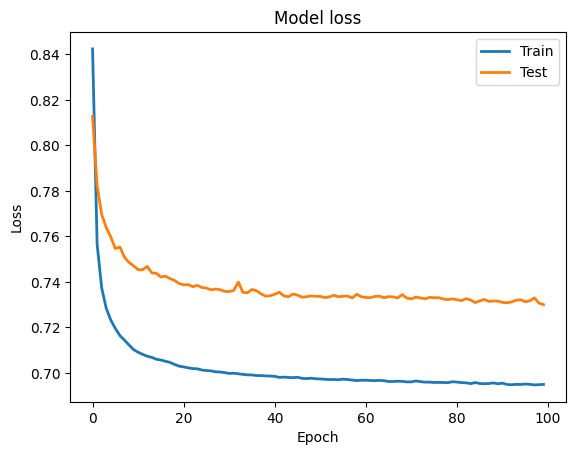

In [15]:
autoencoder = tf.keras.models.load_model('autoencoder_fraud.h5')

plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [16]:
test_x_predictions = autoencoder.predict(test_x)
mse = np.mean(np.power(test_x - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_y})
error_df.describe()

1781/1781 [==============================] - 2s 977us/step


Reconstruction_error    True_class
count          56962.000000  56962.000000
mean               0.729992      0.001633
std                3.412041      0.040374
min                0.041497      0.000000
25%                0.246834      0.000000
50%                0.391457      0.000000
75%                0.618222      0.000000
max              354.214225      1.000000

One important thing to look at is the confusion matrix, i.e. how often an output is predicted correctly. In this case, we have a small rate or fraudulent transactions classified as normal (for which the insurance would likely have to pay if the money can't be recovered otherwise) but we have a high rate of false positivies, i.e. when a normal transaction was predicted fraudulent. While less catastrophic, as the transaction can be confirmed by the user, it can be frustrating for users to have to go through this process too many times.

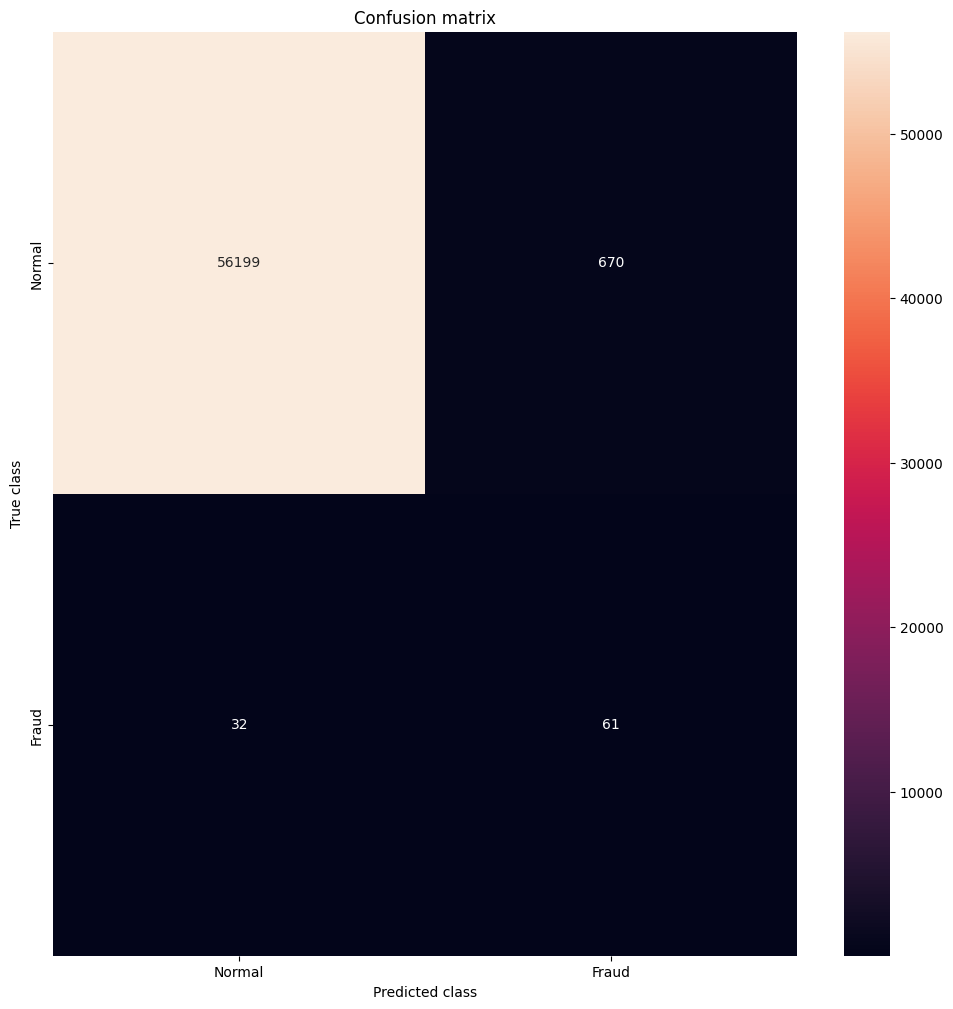

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
threshold_fixed = 5
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, pred_y)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=["Normal","Fraud"], yticklabels=["Normal","Fraud"], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()